<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/project_8CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project Statement- 
>- You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
 - turn images into grayscale
>- Remove background from images.
>- 5) Transform data if needed
    - create training and test sets for data 
    - Resize images into 128 x 128 
    - Normalize data by divding each pixel value by 255 
      a pixel value can be max value of 255 becuase 2^8-1 = 255 (8bits of resolution for pixel values)
    - Turn orginal image into grayscale image to simplify processing of CNN
>- 6) EDA
    - Count of each image class in dataset
    - pie chart counting each image class
    -
    - Plot mean image of each class
    -
    - 
>- 7) Build CNN for classification of 12 different image classes 
    - Use sequential model from tensorflow keras 
    - Compile cnn model with 
    - compile models with early stopping feature to be more efficient if model doens't improve

    - Use keras classifier to hypertune model to get optimal output by using
  best params 

>- 9) Conclusion and business insight. 


### 1) Import libraries needed

1) Import Libraries needed

In [39]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

# import function

%matplotlib inline
import seaborn as sns


# import scaling 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# neural network libraries
import tensorflow as tf
#from tensorflow import keras # importing keras library
from tensorflow.keras import Sequential  # importing the Sequential Model
#from keras.layers import Dense       # importing Dense layer

from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam # Optimizer
#from tensorflow.keras.optimizers import leakyRelu
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding

# import CNN Libraries 

from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")





# import sklearn.metrics

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
import cv2
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###3) import data, check shape of data, and check type of data 

In [40]:
# define folder path to access image files

folderPath = "/content/drive/My Drive/ColabNotebooks/IntroToComputerVision/Project8/"

images = np.load(folderPath + 'images.npy', encoding='bytes')
labels = pd.read_csv(folderPath + "Labels.csv")
labels.shape


(4750, 1)

In [41]:
categories = ["Small-flowered Cranesbill","Fat Hen","Shepherds Purse","Common wheat","Common Chickweed",
"Charlock","Cleavers","Scentless Mayweed","Sugar beet","Maize","Black-grass","Loose Silky-bent"]

In [42]:
images.shape

(4750, 128, 128, 3)

In [43]:
len(images)

4750

In [44]:
print(type(labels))
print(type(images))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### 4), 5) turn images into grayscale and define xtrain and ytrain

> Indented block



In [45]:
#define list for x_train images and convert to grayscale

X_train = []

for img in images:
  #img_gray = cv2.cvtColor(images[img], cv2.COLOR_BGR2GRAY)
  X_train.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
  

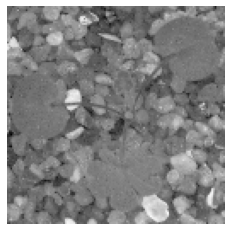

In [46]:
# verify if images was turned into grayscale

plt.imshow(X_train[1], cmap='Greys_r')
#plt.title(labels[1])
plt.axis('off')
plt.show()

In [47]:
# define y-train matrix to correctly identify each class
encoded_labels = pd.get_dummies(labels)
y_train = np.array(encoded_labels)


In [48]:
y_train.shape

(4750, 12)

In [49]:
# Normalize data for X_train array by dividing by 255, which is max value for a pixel.
IMG_SIZE =128
X_train_s = np.array(X_train)/255.0
X_train_s, X_test, y_train_s, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state = 1, stratify = y_train)
X_train_s = np.array(X_train_s).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

### 6) EDA
- sum up each count of each class
- plot pie chart of ccount of each class
- plot mean of each class  

In [50]:
class_label = []
for label, content in encoded_labels.items():
  class_label.append(label)
  print(label)
  #class_label.append(feature.unique())


Label_Black-grass
Label_Charlock
Label_Cleavers
Label_Common Chickweed
Label_Common wheat
Label_Fat Hen
Label_Loose Silky-bent
Label_Maize
Label_Scentless Mayweed
Label_Shepherds Purse
Label_Small-flowered Cranesbill
Label_Sugar beet


In [51]:
class_label

['Label_Black-grass',
 'Label_Charlock',
 'Label_Cleavers',
 'Label_Common Chickweed',
 'Label_Common wheat',
 'Label_Fat Hen',
 'Label_Loose Silky-bent',
 'Label_Maize',
 'Label_Scentless Mayweed',
 'Label_Shepherds Purse',
 'Label_Small-flowered Cranesbill',
 'Label_Sugar beet']

In [52]:
list(labels.Label.unique())

['Small-flowered Cranesbill',
 'Fat Hen',
 'Shepherds Purse',
 'Common wheat',
 'Common Chickweed',
 'Charlock',
 'Cleavers',
 'Scentless Mayweed',
 'Sugar beet',
 'Maize',
 'Black-grass',
 'Loose Silky-bent']

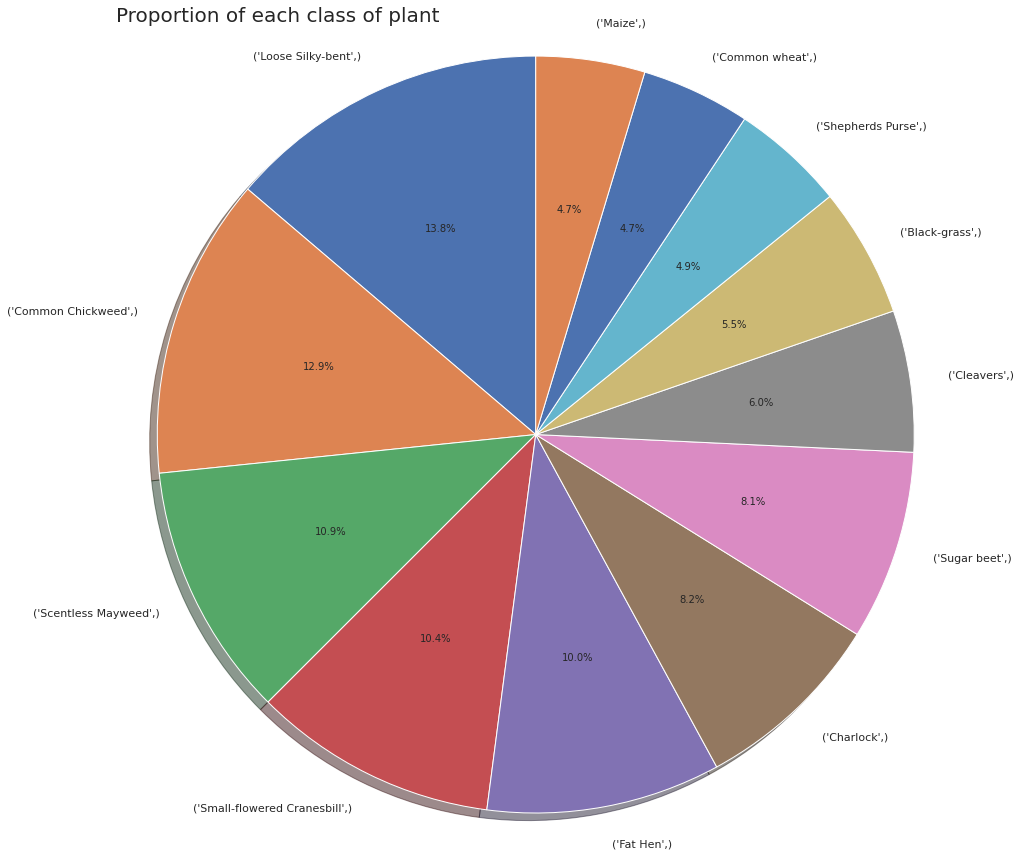

In [53]:
#plotting the pie chart 
 

plot_categories = []
for i in labels.value_counts().keys():
  plot_categories.append(i)
sizes = [labels.value_counts()]

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.pie(sizes, explode=None, labels=plot_categories, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = False)
ax1.axis('equal')
#fontdict = {'fontsize': rcParams['axes.titlesize'],
# 'fontweight' : rcParams['axes.titleweight'],
# 'color' : rcParams['axes.titlecolor'],
# 'verticalalignment': 'baseline',
# 'horizontalalignment': loc}
plt.title("Proportion of each class of plant", size = 20, loc = "left")
plt.show()

In [54]:
# plot mean image from each image classs

In [55]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

In [56]:
Small_flowered_Cranesbill = []
Fat_Hen = []
Shepherds_Purse = []
Common_wheat = []
Common_Chickweed = []
Charlock = []
Cleavers = []
Scentless_Mayweed = []
Sugar_beet = []
Maize = []
Black_grass = []
Loose_Silky_bent = []

plant_list = []

IMG_SIZE = 128
#new_array = cv2.resize(np.array(X_train),(IMG_SIZE,IMG_SIZE)) 
for cat in categories:  
  for img in X_train:
    new_array = np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    #X_train_s = X_train_s.reshape(-1,128,128,1)
    if cat==categories[0]:
      Small_flowered_Cranesbill.append([new_array])
      
    if cat==categories[1]:
      Fat_Hen.append([new_array])
    if cat==categories[2]:
      Shepherds_Purse.append([new_array])
    if cat==categories[3]:
      Common_wheat.append([new_array])
    if cat==categories[4]:
      Common_Chickweed.append([new_array])
    if cat==categories[5]:
      Charlock.append([new_array])
    if cat==categories[6]:
      Cleavers.append([new_array])
    if cat==categories[7]:
      Scentless_Mayweed.append([new_array])
    if cat==categories[8]:
      Sugar_beet.append([new_array])
    if cat==categories[9]:
      Maize.append([new_array])
    if cat==categories[10]:
      Black_grass.append([new_array])
    if cat==categories[11]:
      Loose_Silky_bent.append([new_array])

plant_list = [Small_flowered_Cranesbill,
Fat_Hen,
Shepherds_Purse, 
Common_wheat, 
Common_Chickweed,
Charlock, 
Cleavers, 
Scentless_Mayweed,
Sugar_beet, 
Maize,
Black_grass, 
Loose_Silky_bent] 
    
    
    
               

### plot each mean image for each class 

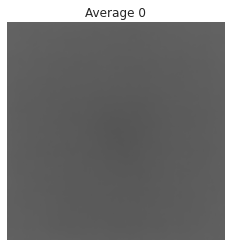

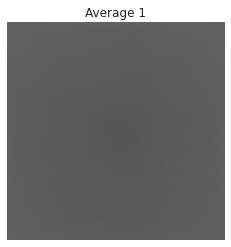

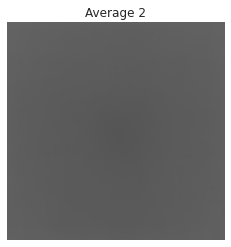

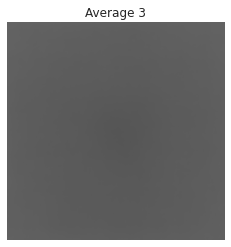

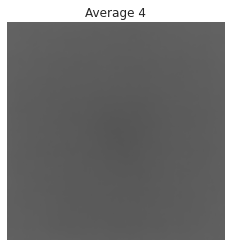

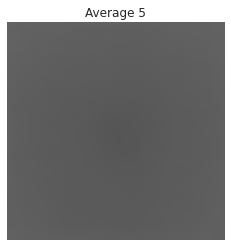

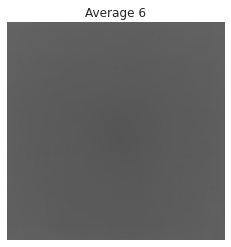

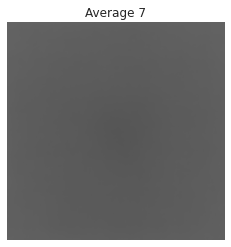

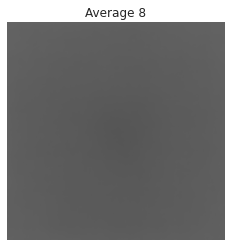

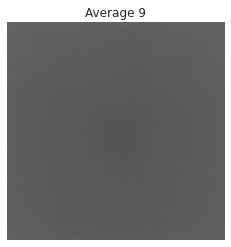

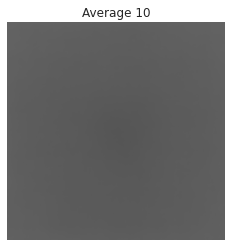

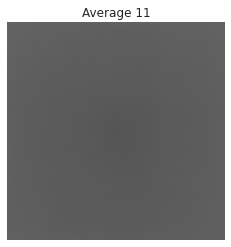

In [57]:


# iterate over each average image

  
for i,j in enumerate(plant_list):
    
  find_mean_img(np.array(j),i)


### Using code from this source to process background of images 
### and plot them in subplot.
https://www.analyticsvidhya.com/blog/2021/05/plant-seedlings-classification-using-cnn-with-python-code/

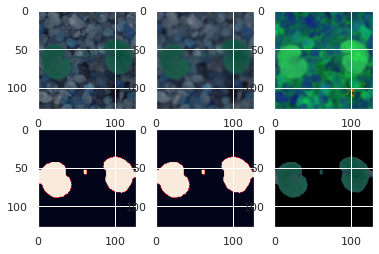

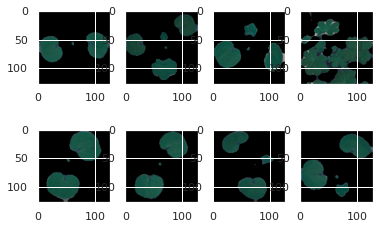

In [58]:

cleaned_img = []
sets = []; getEx = True
for i in images:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    cleaned_img.append(new)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
cleaned_img = np.asarray(cleaned_img)
# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(cleaned_img[i])

### EDA Insights



- Plotting the average image of each class results in a gray bounded scare that is just solid gray. 
- The top 3 weed classes were Loose Silky Bent, Common Chickweed and Scentless Mayweed, they made up of ~ 38 % of the total plant images in the image directory. The angles and lighting differed in pictures as we can see from looking at the output of the graphs. 

- Using the various filters(HSV, blurred) and removing the backgrounds, there has been a significant decrease in background noise. 


In [59]:
cleaned_img.shape

(4750, 128, 128, 3)

In [60]:
# define new x_train and y_train from background removed with grayscale

X_train_new = []
#X_train_new = cv2.cvtColor(cleaned_img, cv2.COLOR_BGR2GRAY)
for img in cleaned_img:
  #img_gray = cv2.cvtColor(cleaned_img[img], cv2.COLOR_BGR2GRAY)
  X_train_new.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [61]:
np.array(X_train_new).shape

(4750, 128, 128)

In [62]:
# Normalize data for X_train array by dividing by 255, which is max value for a pixel.
IMG_SIZE =128
X_train_new = np.array(X_train_new)
X_train_s, X_test, y_train_s, y_test = train_test_split(np.array(X_train_new), y_train, test_size=0.1, random_state = 1, stratify = y_train)
X_train_s = (X_train_s).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_train_s = (X_train_s)/255.0
#X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [63]:
np.array(X_train_s).shape

(4275, 128, 128, 1)

### 7) Build CNN model with sequential model




In [64]:
model = Sequential()
model.add(Conv2D(64, 3, activation="relu", padding="same", input_shape=(128,128,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation="softmax"))
optimizer = Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
history = model.fit(np.array(X_train_s),np.array(y_train_s), validation_split=0.1, batch_size=256,epochs=30)
acc=model.evaluate(np.array(X_test),np.array(y_test))

Epoch 1/30
16/16 [==============================] - 12s 165ms/step - loss: 2.5228 - accuracy: 0.1198 - val_loss: 2.4362 - val_accuracy: 0.2430
Epoch 2/30
16/16 [==============================] - 2s 107ms/step - loss: 2.3652 - accuracy: 0.1736 - val_loss: 2.0952 - val_accuracy: 0.3832
Epoch 3/30
16/16 [==============================] - 2s 107ms/step - loss: 2.2497 - accuracy: 0.2236 - val_loss: 1.9891 - val_accuracy: 0.3855
Epoch 4/30
16/16 [==============================] - 2s 108ms/step - loss: 2.1401 - accuracy: 0.2711 - val_loss: 1.9389 - val_accuracy: 0.3879
Epoch 5/30
16/16 [==============================] - 2s 107ms/step - loss: 2.0854 - accuracy: 0.2859 - val_loss: 1.8227 - val_accuracy: 0.4182
Epoch 6/30
16/16 [==============================] - 2s 108ms/step - loss: 1.9768 - accuracy: 0.3112 - val_loss: 1.7583 - val_accuracy: 0.4346
Epoch 7/30
16/16 [==============================] - 2s 108ms/step - loss: 1.8738 - accuracy: 0.3384 - val_loss: 1.7003 - val_accuracy: 0.4393
Epoch

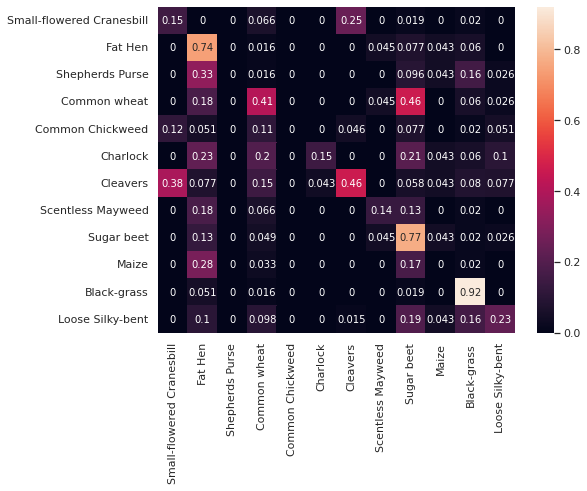

In [65]:
# Test Prediction 
# make predictions on model 
y_test_pred_1 = model.predict(np.array(X_test))
y_test_pred_classes_1 = np.argmax(y_test_pred_1, axis=1)
y_test_pred_prob_1 = np.argmax(y_test, axis=1)


# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
#accuracy_score((y_test), y_test_pred_classes_1)
cf_matrix = confusion_matrix(y_test_pred_prob_1, y_test_pred_classes_1)

# Confusion matrix normalized per category true value
cf_matrix = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=categories, yticklabels=categories, annot=True)

### Looking at the above confusion matrix 
- Cleavers, fat hen, sugarbeets and black grass were identified well 

- All other image classes didn't do well with the model predictions
on the test data. 


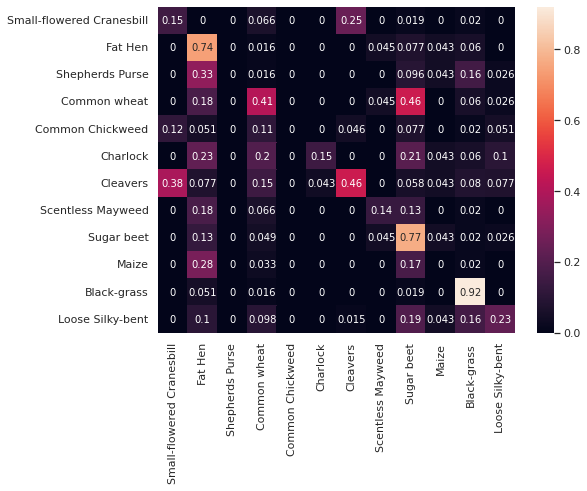

In [66]:
# Test Prediction 
# make predictions on model 
y_test_pred_2 = model.predict(np.array(X_test))
y_test_pred_classes_2 = np.argmax(y_test_pred_2, axis=1)
y_test_pred_prob_2 = np.argmax(y_test, axis=1)


# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
#accuracy_score((y_test), y_test_pred_classes_1)
cf_matrix = confusion_matrix(y_test_pred_prob_2, y_test_pred_classes_2)

# Confusion matrix normalized per category true value
cf_matrix = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=categories, yticklabels=categories, annot=True)

In [67]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 10ms/step - loss: 487.6754 - accuracy: 0.4063


[487.6753845214844, 0.40631580352783203]

Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 0.9050 - accuracy: 0.6708
Epoch 00001: val_accuracy improved from -inf to 0.70877, saving model to best_model.h5
54/54 [==============================] - 3s 55ms/step - loss: 0.9050 - accuracy: 0.6708 - val_loss: 1.0450 - val_accuracy: 0.7088
Epoch 2/100
53/54 [============================>.] - ETA: 0s - loss: 0.9110 - accuracy: 0.6840
Epoch 00002: val_accuracy improved from 0.70877 to 0.72749, saving model to best_model.h5
54/54 [==============================] - 3s 50ms/step - loss: 0.9096 - accuracy: 0.6842 - val_loss: 1.0529 - val_accuracy: 0.7275
Epoch 3/100
53/54 [============================>.] - ETA: 0s - loss: 0.9287 - accuracy: 0.6698
Epoch 00003: val_accuracy did not improve from 0.72749
54/54 [==============================] - 2s 37ms/step - loss: 0.9266 - accuracy: 0.6713 - val_loss: 1.0291 - val_accuracy: 0.7263
Epoch 4/100
53/54 [============================>.] - ETA: 0s - loss: 0.8811 - accuracy: 0.691

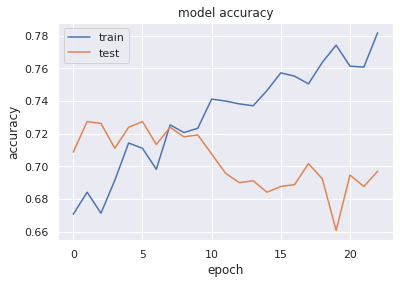

In [68]:
#### Implement second version CNN with call back and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X_train_s, 
          y_train_s,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=100, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.4030 - accuracy: 0.1746
Epoch 00001: val_accuracy improved from -inf to 0.16959, saving model to best_model.h5
54/54 [==============================] - 4s 61ms/step - loss: 2.4030 - accuracy: 0.1746 - val_loss: 2.4629 - val_accuracy: 0.1696
Epoch 2/30
53/54 [============================>.] - ETA: 0s - loss: 1.8229 - accuracy: 0.3617
Epoch 00002: val_accuracy improved from 0.16959 to 0.19766, saving model to best_model.h5
54/54 [==============================] - 3s 51ms/step - loss: 1.8209 - accuracy: 0.3626 - val_loss: 2.4331 - val_accuracy: 0.1977
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 1.6487 - accuracy: 0.4161
Epoch 00003: val_accuracy improved from 0.19766 to 0.35088, saving model to best_model.h5
54/54 [==============================] - 3s 52ms/step - loss: 1.6487 - accuracy: 0.4161 - val_loss: 2.4028 - val_accuracy: 0.3509
Epoch 4/30
53/54 [============================>.] - ETA: 0s -

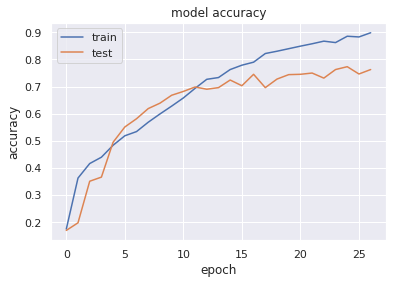

In [69]:
#### Implement second version CNN with call back and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit((X_train_s), 
          (y_train_s),  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Run model with colored images and check output

In [70]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 1s 15ms/step - loss: 873.1956 - accuracy: 0.4295


[873.195556640625, 0.4294736981391907]

In [71]:
# run model with colored images instead of gray_scale 
X_train_color = cleaned_img


Epoch 1/100
133/133 [============================>.] - ETA: 0s - loss: 2.0257 - accuracy: 0.3448
Epoch 00001: val_accuracy did not improve from 0.77310
133/133 [==============================] - 10s 66ms/step - loss: 2.0223 - accuracy: 0.3452 - val_loss: 1.6649 - val_accuracy: 0.4199
Epoch 2/100
134/133 [==============================] - ETA: 0s - loss: 1.5400 - accuracy: 0.4601
Epoch 00002: val_accuracy did not improve from 0.77310
133/133 [==============================] - 9s 66ms/step - loss: 1.5400 - accuracy: 0.4601 - val_loss: 1.6180 - val_accuracy: 0.4585
Epoch 3/100
134/133 [==============================] - ETA: 0s - loss: 1.4168 - accuracy: 0.4942
Epoch 00003: val_accuracy did not improve from 0.77310
133/133 [==============================] - 9s 65ms/step - loss: 1.4168 - accuracy: 0.4942 - val_loss: 1.3252 - val_accuracy: 0.5450
Epoch 4/100
134/133 [==============================] - ETA: 0s - loss: 1.3498 - accuracy: 0.5231
Epoch 00004: val_accuracy did not improve from 0.7

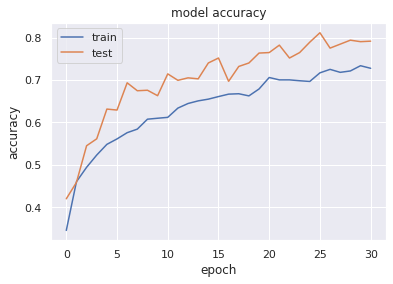

In [72]:
# Use image generator along with CNN 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_s)
# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(X_train_s, y_train_s, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train_s, y_train_s,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(X_train_s) / 32, epochs = 100,
         callbacks = [es, mc], use_multiprocessing = True)
# here's a more "manual" example
#for e in range(100):
#    print('Epoch', e)
#    batches = 0
#    for x_batch, y_batch in datagen.flow(X_train_s, y_train_s, batch_size=32):
#        model.fit(x_batch, y_batch)
#        batches += 1
#        if batches >= len(X_train_s) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
#            break
#history=model.fit((X_train_s), 
#          (y_train_s),  #It expects integers because of the sparse_categorical_crossentropy loss function
#          epochs=30, #number of iterations over the entire dataset to train on
#          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# run model with color images instead of grayscale
# Normalize data for X_train array by dividing by 255, which is max value for a pixel.
IMG_SIZE =128
X_train_color = cleaned_img
X_train_s_color, X_test, y_train_s, y_test = train_test_split(X_train_color, y_train, test_size=0.1, random_state = 1, stratify = y_train)
X_train_s_color = (X_train_s_color).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X_train_s_color = (X_train_s_color)/255.0
#X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

### Use colored x_train array to fit with model

Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.5682 - accuracy: 0.1409
Epoch 00001: val_accuracy improved from -inf to 0.16257, saving model to best_model.h5
54/54 [==============================] - 4s 61ms/step - loss: 2.5682 - accuracy: 0.1409 - val_loss: 2.4814 - val_accuracy: 0.1626
Epoch 2/30
54/54 [==============================] - ETA: 0s - loss: 2.1778 - accuracy: 0.2655
Epoch 00002: val_accuracy improved from 0.16257 to 0.37076, saving model to best_model.h5
54/54 [==============================] - 3s 58ms/step - loss: 2.1778 - accuracy: 0.2655 - val_loss: 2.4565 - val_accuracy: 0.3708
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 1.8606 - accuracy: 0.3564
Epoch 00003: val_accuracy improved from 0.37076 to 0.46433, saving model to best_model.h5
54/54 [==============================] - 3s 54ms/step - loss: 1.8606 - accuracy: 0.3564 - val_loss: 2.4224 - val_accuracy: 0.4643
Epoch 4/30
53/54 [============================>.] - ETA: 0s -

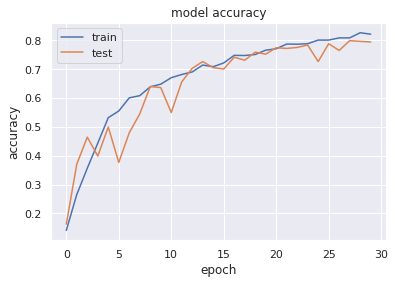

In [77]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit((X_train_s_color), 
          (y_train_s),  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### add gaussian blurring to images and check for model improvement
# gaussian filter to blurr images that are grayscaled

from scipy.ndimage.filters import gaussian_filter


X_train_gauss = gaussian_filter(np.array(X_train),sigma = .7)


In [ ]:
# verify shape of grayscaled and blurred array
X_train_gauss.shape

In [ ]:
# verify if images was turned into grayscale and blurred

plt.imshow(X_train_gauss[3], cmap='Greys_r')
#plt.title(labels[1])
plt.axis('off')
plt.show()

In [78]:
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_s_color)
# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(X_train_s_color, y_train_s, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train_s_color, y_train_s,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(X_train_s_color) / 32, epochs = 30,
         callbacks = [es, mc], use_multiprocessing = True)

Epoch 1/30
134/133 [==============================] - ETA: 0s - loss: 1.6880 - accuracy: 0.5035
Epoch 00001: val_accuracy improved from -inf to 0.63275, saving model to best_model.h5
133/133 [==============================] - 22s 162ms/step - loss: 1.6880 - accuracy: 0.5035 - val_loss: 1.2899 - val_accuracy: 0.6327
Epoch 2/30
134/133 [==============================] - ETA: 0s - loss: 1.2383 - accuracy: 0.5756
Epoch 00002: val_accuracy improved from 0.63275 to 0.65380, saving model to best_model.h5
133/133 [==============================] - 21s 159ms/step - loss: 1.2383 - accuracy: 0.5756 - val_loss: 1.2076 - val_accuracy: 0.6538
Epoch 3/30
134/133 [==============================] - ETA: 0s - loss: 1.0829 - accuracy: 0.6283
Epoch 00003: val_accuracy improved from 0.65380 to 0.71228, saving model to best_model.h5
133/133 [==============================] - 22s 162ms/step - loss: 1.0829 - accuracy: 0.6283 - val_loss: 1.0266 - val_accuracy: 0.7123
Epoch 4/30
134/133 [=======================

### Evaluate model on test set and check score
- use classification report 

In [79]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 11ms/step - loss: 45.6517 - accuracy: 0.2968


[45.6517333984375, 0.296842098236084]

In [80]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)
print(classification_report(y_check, y_class))

[[ 7  0  0  2  0  0  0  0  0  0  0 17]
 [ 0 13  0  0  0  0  0 21  0  1  0  4]
 [ 0 11  0  1  0  0  0 10  0  0  0  7]
 [ 0  0  0 59  0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  1  0  0  0 20]
 [ 0  1  0 30  0  1  0  1  0  7  0  7]
 [28  0  0  6  0  0  0  0  0  0  0 31]
 [ 0  0  0 15  0  0  0  7  0  0  0  0]
 [ 0  0  0 17  0  0  0 25  0  2  0  8]
 [ 0  1  0  8  0  0  0  7  0  7  0  0]
 [ 0  0  0 17  0  0  0  3  0  2 28  0]
 [ 0  5  0  5  0  0  0 10  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.20      0.27      0.23        26
           1       0.42      0.33      0.37        39
           2       0.00      0.00      0.00        29
           3       0.37      0.97      0.53        61
           4       0.00      0.00      0.00        22
           5       1.00      0.02      0.04        47
           6       0.00      0.00      0.00        65
           7       0.08      0.32      0.13        22
           8       0.00      0.00      0.00 

### Using datagen model 
- Model performed well with training and validation but not so much on test data 
- The images are lowresolution and this could be a reason why.
- This is the best model so far 
- we will hypertune this model configuration

### Hypertune neural network
-use gridsearchcv method to hypertune 


In [ ]:
# define model to use with hypertuning

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_model(optimizer):
   es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
   mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
   model = Sequential()
#

   model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
   model.add(BatchNormalization())
   model.add(MaxPool2D(pool_size=(2,2)))
   model.add(Dropout(0.25))
#
   model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
   model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
   model.add(Dropout(0.25))
#
   model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
   model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
   model.add(Dropout(0.3))
#
   model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
   model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
   model.add(Dropout(0.3))

#
   model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
   model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
   model.add(Dropout(0.3))

# 
   model.add(Flatten())
   model.add(Dense(1024, activation = "relu"))
   model.add(Dropout(0.5))
   model.add(Dense(12, activation = "softmax"))
   optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
   model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
   epochs = 200  
   batch_size = 64
    #X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=700, verbose=1, class_weight=class_weight, callbacks=[es])

   return model

model = KerasClassifier(build_fn = build_model)
parameters = {'batch_size': [32,64,128],
              'epochs': [50,100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
                           
# class_weight=class_weight,
grid_search = grid_search.fit(X_train_s_color, y_train_s,verbose = 1, validation_split = 0.1, callbacks = [es])
#grid_search = grid_search.fit(X_train_scaled, y_train_tens,verbose = 1)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score

Epoch 1/50
97/97 [==============================] - 5s 34ms/step - loss: 2.4952 - accuracy: 0.1774 - val_loss: 2.4743 - val_accuracy: 0.2544
Epoch 2/50
97/97 [==============================] - 3s 27ms/step - loss: 2.0007 - accuracy: 0.3216 - val_loss: 2.4167 - val_accuracy: 0.4912
Epoch 3/50
97/97 [==============================] - 3s 26ms/step - loss: 1.7326 - accuracy: 0.3905 - val_loss: 2.3242 - val_accuracy: 0.5906
Epoch 4/50
97/97 [==============================] - 3s 27ms/step - loss: 1.4516 - accuracy: 0.5006 - val_loss: 2.0757 - val_accuracy: 0.5906
Epoch 5/50
97/97 [==============================] - 3s 26ms/step - loss: 1.2980 - accuracy: 0.5487 - val_loss: 1.8781 - val_accuracy: 0.6257
Epoch 6/50
97/97 [==============================] - 3s 27ms/step - loss: 1.2178 - accuracy: 0.5793 - val_loss: 1.6139 - val_accuracy: 0.6491
Epoch 7/50
97/97 [==============================] - 3s 26ms/step - loss: 1.1026 - accuracy: 0.6209 - val_loss: 1.3792 - val_accuracy: 0.6316
Epoch 8/50
97

In [ ]:
print(best_accuracy)
print(best_parameters)

### insights about cnn networks and model building 

- The majority of the models have resulted in overfitting. THe only one that 
didn't over fit was the datagen model with the colored image.
- It is decided to further tune this with the gridsearch method


### Conclusions and business reccomendations 

- With using the classification report on the best performing models
  - the models are still missclassifying images quite frequently in the 
  the test data sample.
- Perhaps this model should be re ran with higher resolution images, this
will give the pictures more contrast within the features and could possibly 
improve model performance.
- Grayscale photos performed the worse, the colored images have been perfoming 
well with the backgrounds removed, but they do poorly on the test data set.
- The image classes are imbalanced and balancing the image classes could improve the model performance as well. 
